139


C:\Users\Sander\AppData\Local\Temp\ipykernel_21008\3674782051.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  get_player_position[val3] = (get_player_position[val1]*get_player_position[val2])/100


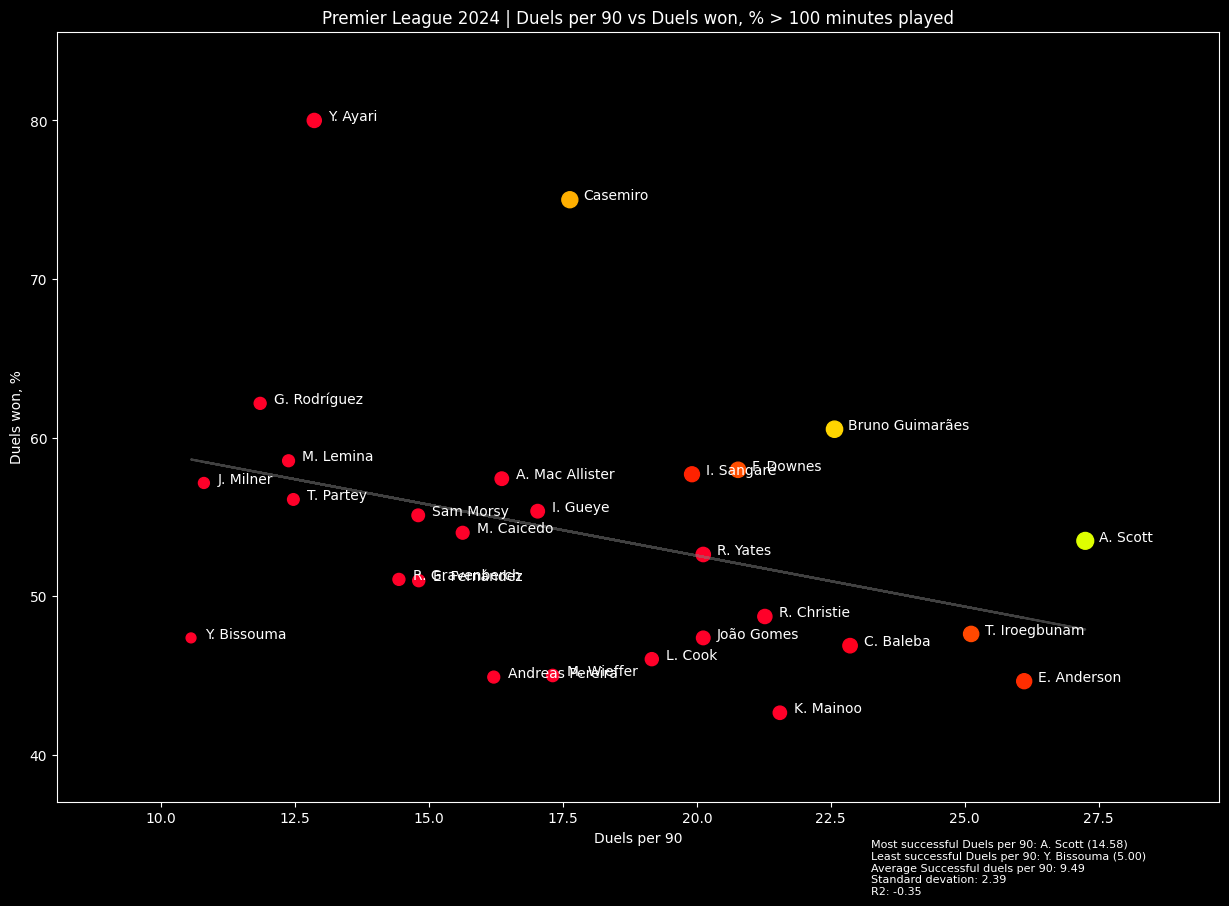

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import requests
from matplotlib import font_manager
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
import seaborn as sns
import json
from collections import Counter
from sklearn.linear_model import LinearRegression


df = pd.read_csv(r'C:\Users\Sander\Downloads\Wyscout_Prospect_Research-main\Wyscout_Prospect_Research-main\Main App\Premier League 24-25.csv')

'''RETURNS A DATAFRAME OF PLAYERS WHO PLAY IN A CERTAIN POSITION WITH MORE THAN 1000 MINUTES PLAYED
   This line of code prints out all unique positions in the dataset: unique_position_names = print(df['Position'].unique())'''
def player_data(position):
    return df[(df['Position'].str.contains(position, case=False)) & (df['Primary position'].str.contains(position, case=False)) & (df['Minutes played'] > 100)]
    
'''Choose the position you want to analyze. Uncomment this code to get all the alternatives: #print(df['Position'].unique())'''
get_player_position =  player_data('dmf')
attackers = player_data('f')

def plot(val1, val2, val3):
    '''Normalize the data to get a color gradient based on val1'''
    if get_player_position.empty:
        print("No data available for the specified position.")
        return
    get_player_position[val3] = (get_player_position[val1]*get_player_position[val2])/100
    norm = plt.Normalize(get_player_position[val1].min(), get_player_position[val1].max())
    colors = plt.cm.gist_rainbow(norm(get_player_position[val3]))
    fig, ax = plt.subplots(figsize=(15,10))
    plt.style.use('dark_background')
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    ax.scatter(get_player_position[val1], get_player_position[val2], color=colors, s=get_player_position[val3]*10)
    ax.set_xlabel(val1)
    ax.set_ylabel(val2)
    ax.set_title(f'Premier League 2024 | {val1} vs {val2} > 100 minutes played')
    ax.margins(0.15)
    for i, txt in enumerate(get_player_position['Player']):
        ax.annotate(txt, (get_player_position[val1].iloc[i], get_player_position[val2].iloc[i]), xytext=(10,0), textcoords='offset points')
    ax.text(0.7, -0.12, f'Most successful {val1}: {get_player_position.loc[get_player_position[val3].idxmax()]['Player']} ({get_player_position[val3].max():.2f})\nLeast successful {val1}: {get_player_position.loc[get_player_position[val3].idxmin()]['Player']} ({get_player_position[val3].min():.2f})\nAverage {val3}: {get_player_position[val3].mean():.2f}\nStandard devation: {get_player_position[val3].std():.2f}\nR2: {np.corrcoef(get_player_position[val1], get_player_position[val2])[0,1]:.2f}',
            fontsize=8,
            transform=ax.transAxes)
    # ax.text(0.005, -0.1, '@Fotbadlstat on X', bbox=dict(facecolor='pink', alpha=0.5, edgecolor='black'), fontsize=8, transform=ax.transAxes)
    slope, intercept = np.polyfit(get_player_position[val1], get_player_position[val2], 1)
    y = slope * get_player_position[val1] + intercept
    ax.plot(get_player_position[val1], y, color='grey', alpha = 0.5)
    
        
plot('Duels per 90', 'Duels won, %', 'Successful duels per 90')
# print(df['Position'].unique())

print(len(df['Position'].unique()))